In [2]:
import pandas as pd

In [68]:
df = pd.read_csv("ds_salaries.csv")
print(df.columns)
print(df['company_size'].unique())

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')
['L' 'S' 'M']


In [4]:
# Task 1
mean_salary = df.groupby("job_title")["salary_in_usd"].mean()
print(mean_salary.idxmax())

Data Analytics Lead


In [5]:
# Task 2:
mean_salary_by_nationality = df.groupby("employee_residence")["salary_in_usd"].mean()
print(mean_salary_by_nationality.idxmax())

MY


In [6]:
# Task 3:
foreign_in_usa = df[(df['company_location'] == 'US') & (df['employee_residence'] != 'US')]
domestic_in_usa = df[(df['company_location'] == 'US') & (df['employee_residence'] == 'US')]

foreign_avg_salary = foreign_in_usa['salary_in_usd'].mean()
domestic_avg_salary = domestic_in_usa['salary_in_usd'].mean()

print(f"Foreigner mean salary: {foreign_avg_salary}")
print(f"Domestic mean salary: {domestic_avg_salary}")
print(foreign_avg_salary > domestic_avg_salary)
# Nhân sự ngoại quốc không có mức lương trung bình cao hơn nhân sự trong nước

Foreigner mean salary: 79366.84
Domestic mean salary: 148955.9
False


In [7]:
# Task 4
data_engineer_salary = df[df["job_title"] == "Data Scientist"]
data_engineer_salary_mean = data_engineer_salary.groupby("company_size")["salary_in_usd"].mean()
print(data_engineer_salary_mean[["S", "M"]])

company_size
S     51925.761905
M    126380.753247
Name: salary_in_usd, dtype: float64


In [8]:
# Task 5
data_engineer_salary_mean = data_engineer_salary.groupby("experience_level")["salary_in_usd"].mean()
print(data_engineer_salary_mean)
# SE có lương trung bình cao nhất, sau đó là MI và EN

experience_level
EN     55330.909091
MI     82039.133333
SE    152971.016393
Name: salary_in_usd, dtype: float64


In [9]:
# Task 6
employee_in_us = df[df["company_location"] == "US"]
foreigner_in_us = employee_in_us[employee_in_us["employee_residence"] != "US"]
foreigner_native_ratio = len(foreigner_in_us)*100/len(employee_in_us)
print(foreigner_native_ratio)

7.042253521126761


In [10]:
# Task 7
level_MI = df[(df["experience_level"] == "MI") & (df["employee_residence"] == df["company_location"])]

mean_by_jobtitle = level_MI.groupby("job_title")["salary_in_usd"].mean()
print(mean_by_jobtitle.nlargest(3))

job_title
Financial Data Analyst                450000.0
Applied Machine Learning Scientist    423000.0
Data Science Manager                  200000.0
Name: salary_in_usd, dtype: float64


In [11]:
# Task 8
germany_job = df[df["company_location"] == "DE"]
germany_salary_by_title = germany_job.groupby("job_title")["salary_in_usd"].mean()
germany_salary_by_title.nsmallest(1)

job_title
ML Engineer    15966.0
Name: salary_in_usd, dtype: float64

In [20]:
# Task 9
se_data = df[df["experience_level"] == "SE"]
mi_data = df[df["experience_level"] == "MI"]

mean_se_data = se_data.groupby("job_title")["salary_in_usd"].mean()
mean_mi_data = mi_data.groupby("job_title")["salary_in_usd"].mean()


difference = abs(mean_se_data - mean_mi_data)

print(difference.idxmin())

Machine Learning Developer


In [ ]:
# Task 10
mean_salary_by_job_level = df.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index()
mean_salary_by_job_level["rank"] = mean_salary_by_job_level.groupby('experience_level')['salary_in_usd'].rank(ascending=False)
top_5_jobs = mean_salary_by_job_level[mean_salary_by_job_level["rank"] <= 5]
job_title_counts = top_5_jobs['job_title'].value_counts()

all_levels = df['experience_level'].nunique() 
consistent_top_jobs = job_title_counts[job_title_counts == all_levels].index
print(consistent_top_jobs)
# Không có job nào nằm trong top 5 ở tất cả các level

Index([], dtype='object', name='job_title')


In [70]:
# Task 11
company_s_m = df[(df['company_size'] == 'S') | (df['company_size'] == 'M')]

en_data = company_s_m[(company_s_m["experience_level"] == "EN")]
ex_data = company_s_m[(company_s_m["experience_level"] == "EX")]

mean_se_data = se_data.groupby("job_title")["salary_in_usd"].mean()
mean_mi_data = mi_data.groupby("job_title")["salary_in_usd"].mean()


difference = abs(mean_se_data - mean_mi_data)

print(difference.idxmax())

Applied Data Scientist


In [ ]:
# Task 12
foreign_employee = df[df["employee_residence"] != df["company_location"]]
mean_salary_by_country = foreign_employee.groupby('company_location')['salary_in_usd'].mean()
print(mean_salary_by_country.idxmax())

PL


experience_level  company_size
EN                L                72813.241379
                  M                50321.800000
                  S                62185.310345
EX                L               221942.181818
                  M               178241.750000
                  S               201309.333333
MI                L                98030.372093
                  M                90091.081633
                  S                51159.379310
SE                L               147591.013889
                  M               137815.596774
                  S               116026.727273
Name: salary_in_usd, dtype: float64


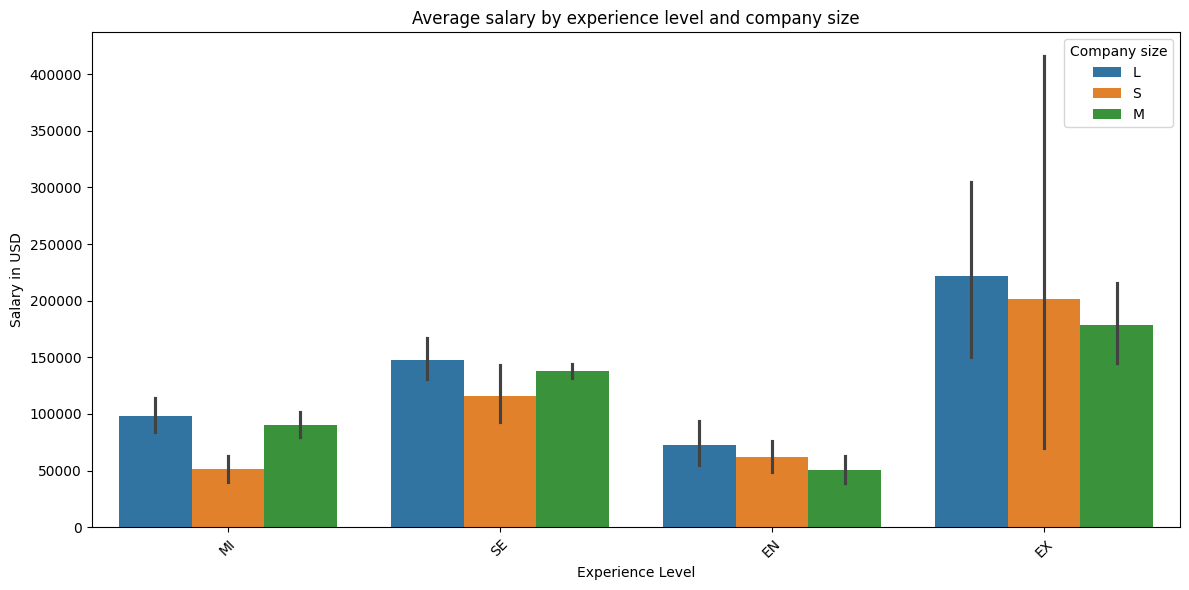

In [ ]:
# Task 13
import matplotlib.pyplot as plt
import seaborn as sns

mean_salary_by_experience = df.groupby(['experience_level', 'company_size'])['salary_in_usd'].mean()
print(mean_salary_by_experience)
plt.figure(figsize=(12, 6))
sns.barplot(x='experience_level', y='salary_in_usd', hue='company_size', data=df)
plt.title('Average salary by experience level and company size')
plt.ylabel('Salary in USD')
plt.xlabel('Experience Level')
plt.legend(title='Company size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Khẳng định này đúng với experience level MI và SE. Với EN và EX thì công ty quy mô S có lương trung bình cao hơn công ty quy mô M 

In [ ]:
# Task 14
mean_salary_by_job_title = df.groupby('job_title')['salary_in_usd'].mean()
mean_salary_by_job_title.sort_values(ascending=False)

job_title
Data Analytics Lead                         405000.000000
Principal Data Engineer                     328333.333333
Financial Data Analyst                      275000.000000
Principal Data Scientist                    215242.428571
Director of Data Science                    195074.000000
Data Architect                              177873.909091
Applied Data Scientist                      175655.000000
Analytics Engineer                          175000.000000
Data Specialist                             165000.000000
Head of Data                                160162.600000
Machine Learning Scientist                  158412.500000
Data Science Manager                        158328.500000
Director of Data Engineering                156738.000000
Head of Data Science                        146718.750000
Applied Machine Learning Scientist          142068.750000
Lead Data Engineer                          139724.500000
Data Analytics Manager                      127134.285714
Clou

In [94]:
# Task 15
mean_salary_by_job_company_location = df.groupby(['job_title', 'company_location'])['salary_in_usd'].mean().reset_index()

mean_salary_by_job_company_location['rank'] = mean_salary_by_job_company_location.groupby('company_location')['salary_in_usd'].rank(ascending=False)

highest_income_jobs = mean_salary_by_job_company_location[mean_salary_by_job_company_location['rank'] == 1]

lowest_income_jobs = mean_salary_by_job_company_location[mean_salary_by_job_company_location['rank'] >= mean_salary_by_job_company_location.groupby('company_location')['rank'].transform('max') - 2]

result = pd.merge(highest_income_jobs, lowest_income_jobs, on='job_title', suffixes=('_highest', '_lowest'))
result = result[result['company_location_highest'] != result['company_location_lowest']]
unique_result = result.drop_duplicates(subset=['job_title'])
print(unique_result[['job_title']])

                             job_title
1                         AI Scientist
3                    Big Data Engineer
13            Computer Vision Engineer
16   Computer Vision Software Engineer
17             Data Analytics Engineer
19                       Data Engineer
49            Data Engineering Manager
50               Data Science Engineer
53                      Data Scientist
281                       Head of Data
292          Machine Learning Engineer
370         Machine Learning Scientist
374                 Research Scientist
